<a href="https://colab.research.google.com/github/tchappui/heia-course-chemical-process-intensification/blob/master/Part1/S04_Exercise6b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S04 Exercise 6b

Same as exercise 6 but a generalized solving path was used to find the solution. This generalized solving path is adapted for cases where several chemical reactions occur in parallel in the reaction mixture.

## Importation of the needed libraries

In [0]:
# vectors and linear algebra
import numpy as np

# visualization tools
import matplotlib.pyplot as plt

# solvers to integrate ordinary differential equations
import scipy.integrate as solvers

## Definition of the constants

In [0]:
R = 0.0821 # L * atm/mol * K
P0 = 10 # atm

CA0 = 0.2 #  mol/L
CB0 = 0.2 #  mol/L
CC0 = 0 #  mol/L
CT0 = 0.4 #  mol/L

T0 = P0 / R / CT0 # K

FA0 = 2 # mol/min
FB0 = FA0 # mol/min
FC0 = 0 # mol/min
FT0 = FA0 + FB0 + FC0 # mol/min

alpha = 0.0099 # 1/kg
k = 1.5 # L/mol/kg/min

## Definition of the balance equations

In [0]:
def balances(variables, W):
    FA, FB, FC, y = variables
    
    P = y * P0
    CT = P / R / T0
    FT = FA + FB + FC
    
    CA = CT * FA / FT
    CB = CT * FB / FT
    CC = CT * FC / FT

    r = k * CA * CB
    RA = -r
    RB = -r
    RC = 2 * r

    dFA = RA
    dFB = RB
    dFC = RC
    dy = -(alpha / 2 / y) * (T0 / T0) * FT / FT0

    return dFA, dFB, dFC, dy

## Initial conditions and integration range

In [0]:
initial_conditions = [FA0, FB0, FC0, 1] # [FA0, FB0, FC0, y0]

In [0]:
W = np.arange(0, 100, 0.1)

In [0]:
results = solvers.odeint(
    balances, 
    initial_conditions, 
    W,
    (alpha,)
)

results2 = solvers.odeint(
    balances, 
    initial_conditions, 
    W,
    (0,)
)

In [0]:
FA = results[:,0]
FB = results[:,1]
FC = results[:,2]
P = results[:,3] * P0
X = 1 - FA / FA0

FA2 = results2[:,0]
FB2 = results2[:,1]
FC2 = results2[:,2]
P2 = results2[:,3] * P0
X2 = 1 - FA2 / FA0

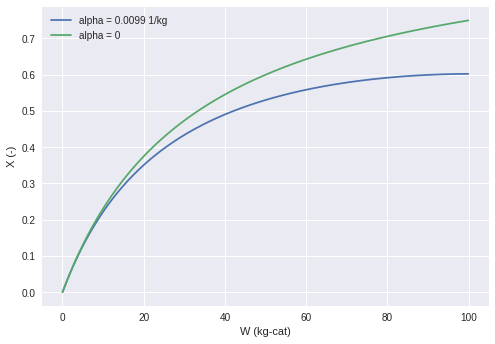

In [8]:
plt.plot(W, X, W, X2)
plt.xlabel('W (kg-cat)')
plt.ylabel('X (-)')
plt.legend(['alpha = 0.0099 1/kg', 'alpha = 0'])
plt.show()

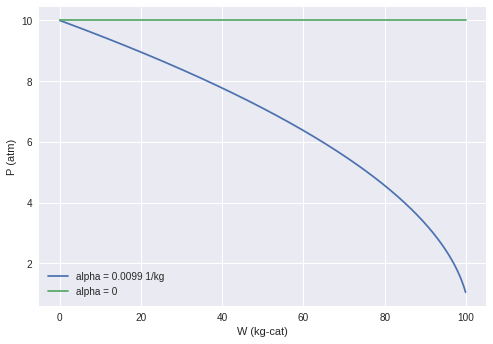

In [9]:
plt.plot(W, P, W, P2)
plt.xlabel('W (kg-cat)')
plt.ylabel('P (atm)')
plt.legend(['alpha = 0.0099 1/kg', 'alpha = 0'])
plt.show()